<a href="https://colab.research.google.com/github/AhmetSarici/DataScience/blob/ML/Ke%C5%9Fif%C3%A7i%20Veri%20Analizi/Ke%C5%9Fif%C3%A7iVeri_Analizi_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Veri seti hikayesi
total_bill :yemeğin fiyatı(bahşiş ve vergi dahil)

tip :Bahşiş

sex :Ödeme yapan kişinin cinsiyeri(0=male, 1=female)

smoker :Sigara içen (0=No, 1=Yes)

day :Gün (3=Thur, 4=Fri, 5=Sat, 6=Sun)

time :Ne zaman? (0=Day, 1=Night)

size :Grupta kaç kişi var?

In [ ]:
import seaborn as sns
tips= sns.load_dataset("tips")
df=tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


Cinsiyet dağılımı nedir?

In [ ]:
df["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

Sigara kullanım durumu nedir?

In [ ]:
df["smoker"].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

Hangi günler kaç müşteri geliyor?

In [ ]:
df["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

Müşteriler hangi öğünde ne kadar rağbet gösteriyor?

In [ ]:
df["time"].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

# Boxplot
Kutu Grafiğinin Oluşturulması

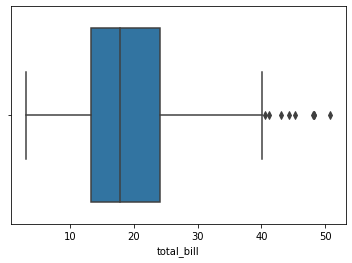

In [ ]:
sns.boxplot(x=df["total_bill"]);

Soldan sağa; min değer/%25-20 / Ort çizgi medyan/%75/ En sağdaki noktalı kısım max


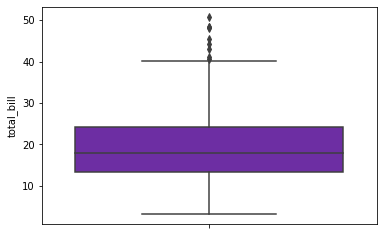

In [ ]:
sns.boxplot(y= df["total_bill"], orient="v", color="#6F1AB6");

# Çaprazlama
İşletme hangi günler daha fazla kazanıyor?

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


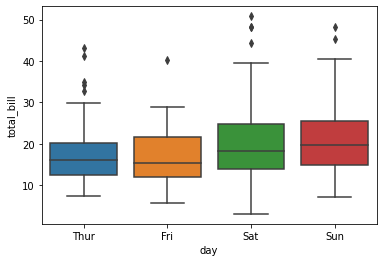

In [ ]:
sns.boxplot(x="day",y="total_bill",data=df);

In [ ]:
df["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [ ]:
df.groupby(["day"])["total_bill"].mean()

day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64

In [ ]:
df.groupby(["day"])["total_bill"].median()

day
Thur    16.20
Fri     15.38
Sat     18.24
Sun     19.63
Name: total_bill, dtype: float64

Pazar günü daha az müşteri geldiği halde daha fazla para bıraktığı görülüyor.

---




Mathplotlib kütüphanesi kullanımı ile

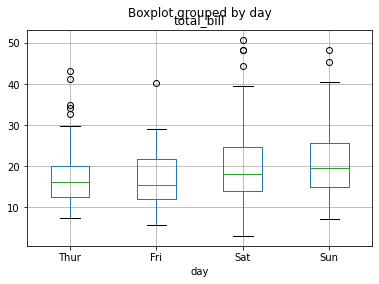

In [ ]:
import matplotlib.pyplot as plt
df.boxplot(column="total_bill",by="day")
plt.show();

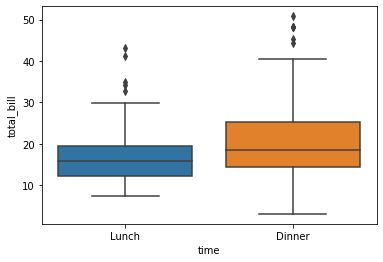

In [ ]:
#Sabah mı akşam mı daha fazla kazanılıyor?
sns.boxplot(x="time",y="total_bill", data=df);

In [ ]:
df["time"].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [ ]:
df.groupby(["time"])["total_bill"].mean()

time
Lunch     17.168676
Dinner    20.797159
Name: total_bill, dtype: float64

In [ ]:
df.groupby(["time"])["total_bill"].median()

time
Lunch     15.965
Dinner    18.390
Name: total_bill, dtype: float64

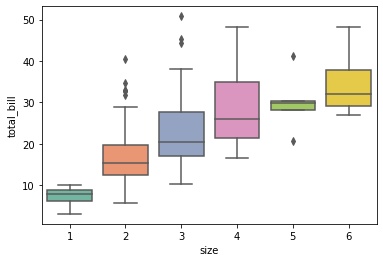

In [ ]:
#Yemeğe gelen grupların kazanç durumunun gözlenmesi
sns.boxplot(x="size",y="total_bill", data=df,palette="Set2");

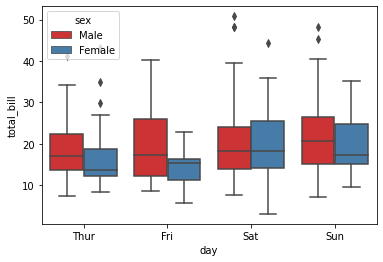

In [ ]:
#Gün gün yapılan ödemelerin cinsiyet dağılımı
sns.boxplot(x="day",y="total_bill", hue="sex", data=df, palette="Set1");



---

Grupların kişi sayısına göre kişi başı ödeme miktarı incelendiğinde

In [ ]:
df['kisibasinadusenmiktar'] = df['total_bill'] / df['size']
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size',
       'kisibasinadusenmiktar', 'oran'],
      dtype='object')

In [ ]:
df.groupby('size')['kisibasinadusenmiktar'].max()

size
1    10.070000
2    20.275000
3    16.936667
4    12.082500
5     8.238000
6     8.028333
Name: kisibasinadusenmiktar, dtype: float64

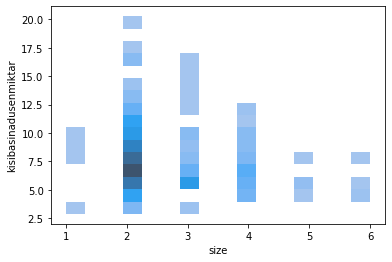

In [ ]:
sns.histplot(x = 'size' , y = 'kisibasinadusenmiktar' , data = df);

In [ ]:
df["size"].value_counts()

2    156
3     38
4     37
5      5
1      4
6      4
Name: size, dtype: int64

En sık ödeme yapan müşteri durumunun iki kişilik müşteri grubunda olduğu görülmektedir.


---



Bahşiş bırakma durumunu inceleyecek olur isek


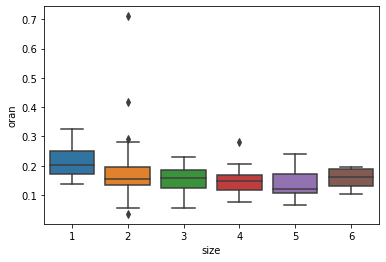

In [ ]:
df['oran'] = df['tip'] / df['total_bill']
sns.boxplot( x = "size" , y = "oran", data=df); 

Müşteri tek olduğunda, sayının arttığı durumlara nazaran daha fazla miktarda bahşiş bıraktığı görülmektedir. Ancak toplam bahşiş durumu da dikkate alınmalıdır.

In [ ]:
df.groupby(["size"])["tip"].sum()

size
1      5.75
2    402.84
3    128.94
4    153.01
5     20.14
6     20.90
Name: tip, dtype: float64

#Violin Grafiği

In [ ]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,kisibasinadusenmiktar,oran
0,16.99,1.01,Female,No,Sun,Dinner,2,8.495000,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,3.446667,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,7.003333,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,11.840000,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,6.147500,0.146808


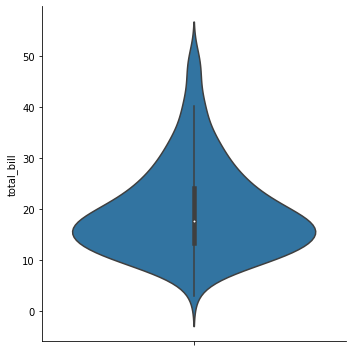

In [ ]:
sns.catplot(y="total_bill", kind="violin", data=df);

##Violin Çaprazlama

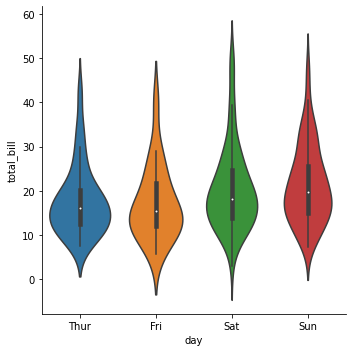

In [ ]:
sns.catplot(x="day",y="total_bill", kind="violin", data=df);

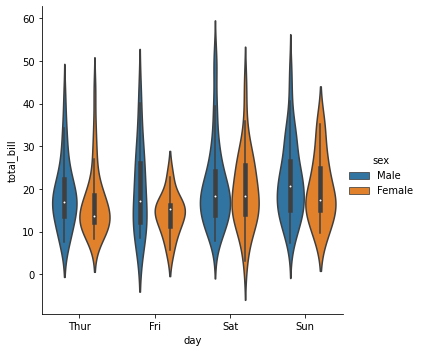

In [ ]:
sns.catplot(x="day",y="total_bill",hue="sex", kind="violin", data=df);

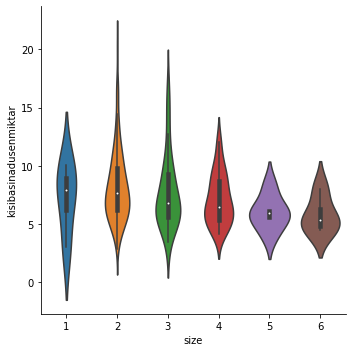

In [ ]:
sns.catplot(x="size",y="kisibasinadusenmiktar", kind="violin", data=df);

#Korelasyon Grafikleri

##Scatter Plot (Saçılım Grafiği): Sayısal Değişkenler (2 Değişken)

Değişkenler arası ilişkinin incelenmesi.

In [1]:
import seaborn as sns
tips= sns.load_dataset("tips")
df=tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


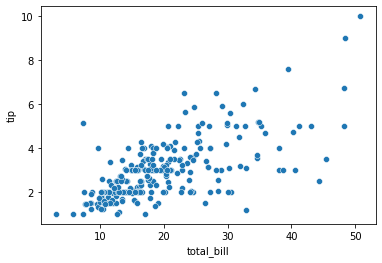

In [2]:
#Bahşiş ve hesap arasındaki ilişki
sns.scatterplot(x="total_bill",y="tip",data=df);

Ödenen hesap arttıkça bahşiş artışı mevcut

## Korelasyon Çaprazlama

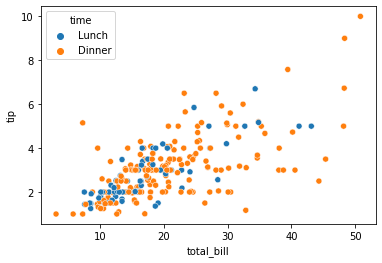

In [3]:
#Kategorik değişken boyut olarak eklenirse
sns.scatterplot(x="total_bill",y="tip",hue="time",data=df);

Akşam yemeklerinde bahşiş artış gösterdiği görülmektedir.

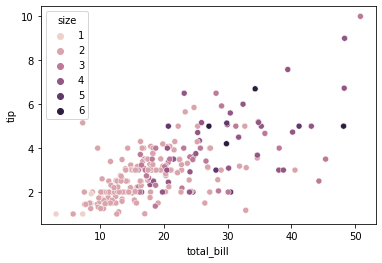

In [4]:
sns.scatterplot(x="total_bill",y="tip",hue="size",data=df);

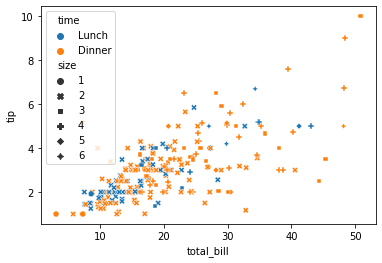

In [5]:
sns.scatterplot(x="total_bill",y="tip",hue="time",style="size",data=df);

Müşteri sayısı gruplarına göre grup bazında bakıldığında, yüksek miktardaki bahşişler grup miktarının ile artış göstermiş, ancak bahşiş bırakma miktarı iki kişilik gruplarda daha fazla bahşiş bırakıldığı da görülmektedir.


---





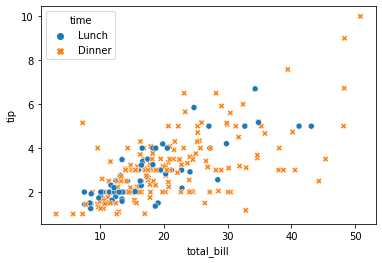

In [6]:
sns.scatterplot(x="total_bill",y="tip",hue="time",style="time",data=df);

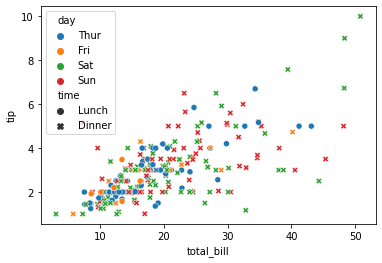

In [7]:
sns.scatterplot(x="total_bill",y="tip",hue="day",style="time",data=df);



---

Sürekli değişken boyut olarak eklersek

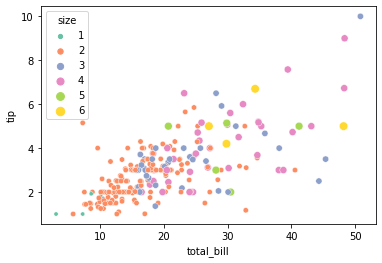

In [8]:
sns.scatterplot(x="total_bill",y="tip",size="size",hue="size", palette="Set2",data=df);

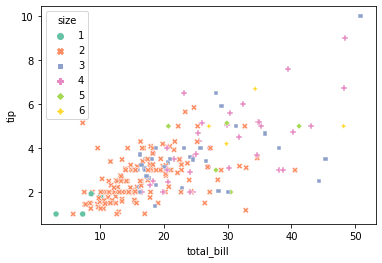

In [9]:
sns.scatterplot(x="total_bill",y="tip",hue="size",style="size", palette="Set2",data=df);

# Doğrusal İlişkinin Gösterilmesi

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
tips= sns.load_dataset("tips")
df=tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


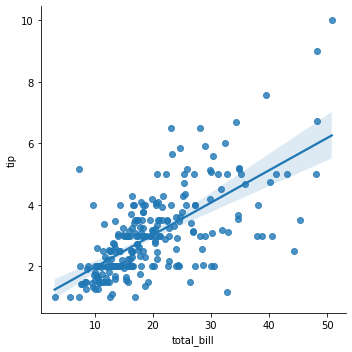

In [11]:
#Lineer Model
sns.lmplot(x="total_bill",y="tip", data=df);

Sigara Kullanım durumuna göre gösterim

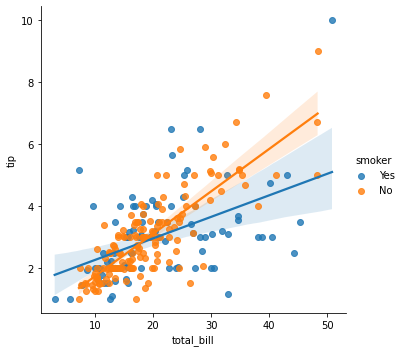

In [12]:
sns.lmplot(x="total_bill",y="tip",hue="smoker", data=df);

Sigara kullanmayanlar daha fazla bahşiş bıraktığı görülmektedir.

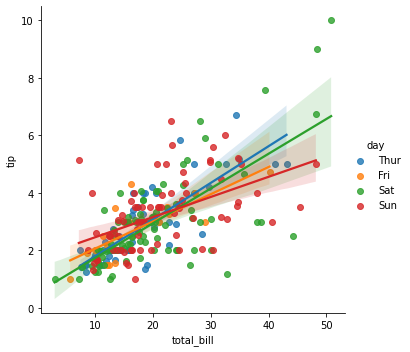

In [13]:
sns.lmplot(x="total_bill",y="tip",hue="day", data=df);

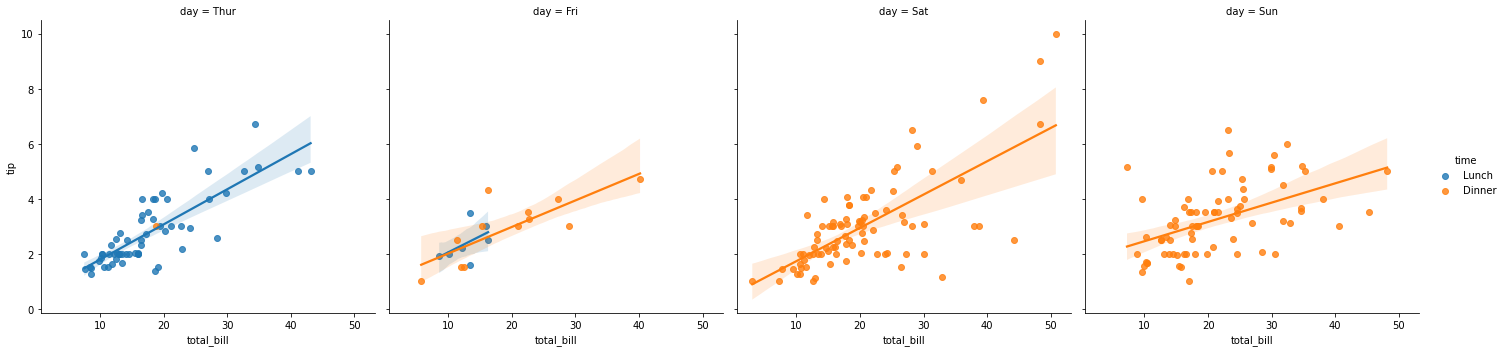

In [14]:
sns.lmplot(x="total_bill",y="tip",hue="time",col="day", data=df);

Günlere göre kırılım incelendiğinde perşembe günleri öğle vaktinde yoğunluğun olduğu hafta sonunda ise akşam yemeği vaktinde yoğunluğun olduğu görülmektedir.


---





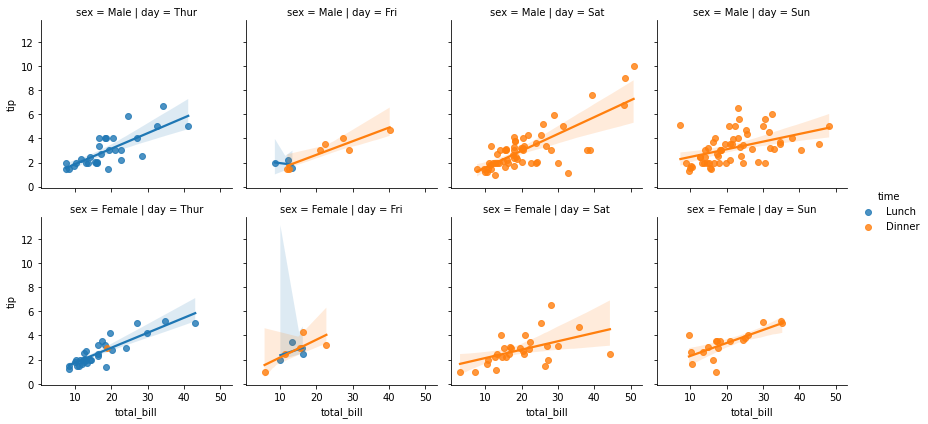

In [15]:
sns.lmplot(x="total_bill",y="tip",hue="time",col="day",row="sex",height=3,aspect=1 , data=df);

Bu grafikte ise Perşembe günleri kahvaltıya kadınların ve erkeklerin hesap ödediği durumlarda birbirine yakın ödeme ve bahşiş bırakma gerçekleştirdikleri görülmekte. Haftasonu ise erkeklerin ödeme ve bahşiş bırakma durumlarının arttığı görülmektedir.

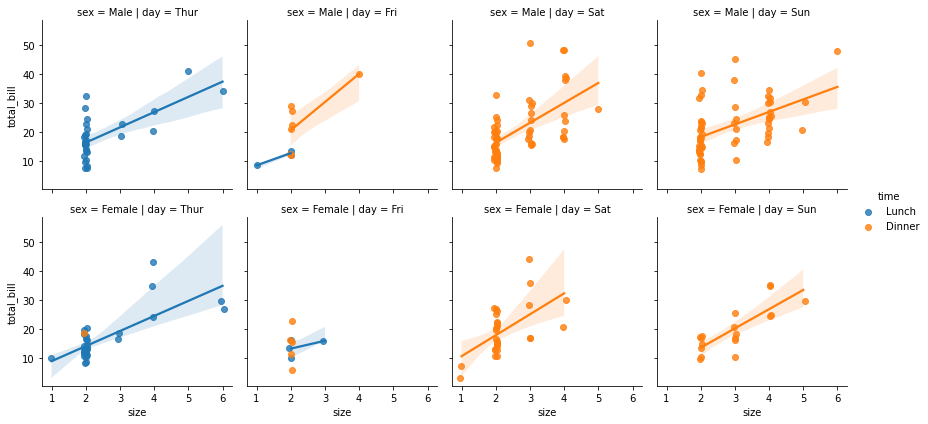

In [25]:
sns.lmplot(x="size",y="total_bill",hue="time",col="day",row="sex",height=3,aspect=1 ,x_jitter=.05, data=df);

Kişi gruplarına göre ödemeyi gerçekleştiren kadın ve erkeklerin günlere dayalı doğrusal grafikleri.


---



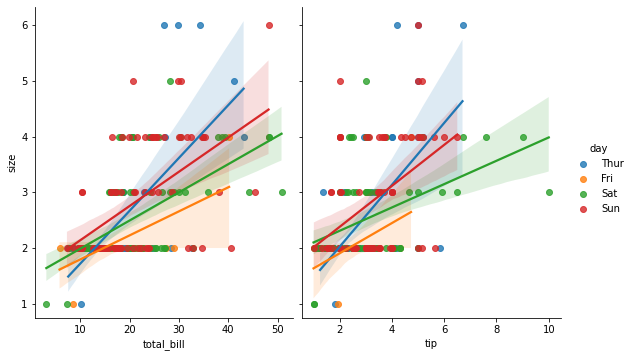

In [19]:
sns.pairplot(data=df, x_vars=["total_bill", "tip"], y_vars=["size"],hue="day", height=5, aspect=.8, kind="reg");

Kişi gruplarının

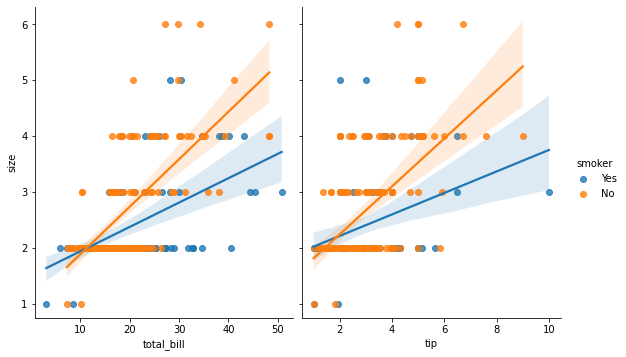

In [26]:
sns.pairplot(data=df, x_vars=["total_bill", "tip"], y_vars=["size"],hue="smoker", height=5, aspect=.8, kind="reg");

Sigara içen kişilerin içmeyen kişilere göre daha düşük miktarda ödeme yaptıkları ve bahşiş bıraktıkları görülmektedir.


---


In [16]:
df.groupby(["size"])["total_bill"].sum()

size
1      28.97
2    2565.89
3     884.55
4    1058.70
5     150.34
6     139.32
Name: total_bill, dtype: float64

In [17]:
df["size"].value_counts()

2    156
3     38
4     37
5      5
1      4
6      4
Name: size, dtype: int64

In [18]:
df.groupby(["size","day","sex"])["total_bill"].sum()

size  day   sex   
1     Thur  Male        0.00
            Female     10.07
      Fri   Male        8.58
            Female      0.00
      Sat   Male        0.00
            Female     10.32
      Sun   Male        0.00
            Female      0.00
2     Thur  Male      396.69
            Female    330.84
      Fri   Male      149.82
            Female    111.33
      Sat   Male      544.77
            Female    347.60
      Sun   Male      584.92
            Female     99.92
3     Thur  Male       41.53
            Female     35.11
      Fri   Male        0.00
            Female     15.98
      Sat   Male      316.87
            Female    142.30
      Sun   Male      224.49
            Female    108.27
4     Thur  Male       47.73
            Female    102.02
      Fri   Male       40.17
            Female      0.00
      Sat   Male      337.56
            Female     50.83
      Sun   Male      360.73
            Female    119.66
5     Thur  Male       41.19
            Female      